## Benckmark Visualization

In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def parse_benchmark_log(filename):
    cases = []
    times = []
    gflops = []
    intensities = []
    Ms = []
    Ns = []
    Ks = []

    with open(filename, 'r') as f:
        content = f.read()

    pattern = re.compile(
        r"Running (\w+) with M=(\d+) N=(\d+) K=(\d+).*?"
        r"cuBLAS GEMM Time: ([\d\.]+) ms, gFLOPS: ([\d\.]+)",
        re.DOTALL
    )

    for match in pattern.finditer(content):
        case_name = match.group(1)
        M = int(match.group(2))
        N = int(match.group(3))
        K = int(match.group(4))
        time_ms = float(match.group(5))
        gflops_val = float(match.group(6))

        flops = 2 * M * N * K
        mem_bytes = 2 * (M * K + K * N + M * N)
        intensity = flops / mem_bytes

        cases.append(case_name)
        Ms.append(M)
        Ns.append(N)
        Ks.append(K)
        times.append(time_ms)
        gflops.append(gflops_val)
        intensities.append(intensity)

    return cases, times, gflops, intensities, Ms, Ns, Ks


def log_results(cases, Ms, Ns, Ks, times, gflops, intensities):
    print(f"{'Case':<10} {'M':>6} {'N':>6} {'K':>6} {'Time (ms)':>12} {'GFLOPS':>10} {'Intensity (FLOPs/byte)':>24}")
    print("-"*80)
    for i in range(len(cases)):
        print(f"{cases[i]:<10} {Ms[i]:6} {Ns[i]:6} {Ks[i]:6} "
              f"{times[i]:12.4f} {gflops[i]:10.2f} {intensities[i]:24.2f}")


def plot_benchmark(cases, times, gflops, intensities):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax2 = ax1.twinx()
    ax3 = ax1.twinx()

    x = range(len(cases))
    bar_width = 0.35

    ax3.spines['right'].set_position(('outward', 60))

    ax1.bar(x, times, width=bar_width, color='tab:blue', label='Time (ms)')
    ax2.bar([i + bar_width for i in x], gflops, width=bar_width, color='tab:orange', label='GFLOPS')
    ax3.plot([i + bar_width/2 for i in x], intensities, color='tab:green', marker='o', label='Compute Intensity (FLOPs/byte)', linewidth=2)

    ax1.set_xlabel('Test Case')
    ax1.set_xticks([i + bar_width/2 for i in x])
    ax1.set_xticklabels(cases, rotation=45, ha='right')

    ax1.set_ylabel('Time (ms)', color='tab:blue')
    ax2.set_ylabel('GFLOPS', color='tab:orange')
    ax3.set_ylabel('Compute Intensity\n(FLOPs/byte)', color='tab:green')

    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    ax3.tick_params(axis='y', labelcolor='tab:green')

    ax1.set_yscale('log')
    ax2.set_yscale('log')
    ax3.set_yscale('log')

    ax1.set_title('Benchmark Results: Time, GFLOPS, and Compute Intensity')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()
    ax1.legend(h1 + h2 + h3, l1 + l2 + l3, loc='upper left')

    plt.tight_layout()
    plt.show()

def plot_benchmark_seaborn(cases, times, gflops, intensities):
    sns.set(style='white', palette="Set2", color_codes=False)
    sns.set_style("ticks")
    colors = sns.color_palette()

    # 归一化
    times_norm = np.array(times) / max(times)
    gflops_norm = np.array(gflops) / max(gflops)
    intensities_norm = np.array(intensities) / max(intensities)

    x = np.arange(len(cases))
    bar_width = 0.35

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # 左轴画时间柱状图（归一化，越小越好）
    bars1 = ax1.bar(x, times, bar_width, label='Time', color=colors[0], edgecolor='black')
    ax1.set_ylabel('Time',  fontsize=18)
    ax1.tick_params(axis='y', labelcolor=colors[0])
    # ax1.set_ylim(0, 1.1)
    ax1.set_xticks(x)
    ax1.set_xticklabels(cases, rotation=45, ha='right', fontsize=14)

    # 右轴画 GFLOPS 柱状图（归一化，越大越好）
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x + bar_width, gflops, bar_width, label='GFLOPS', color=colors[1], edgecolor='black')
    ax2.set_ylabel('GFLOPS',  fontsize=18)
    ax2.tick_params(axis='y', labelcolor=colors[1])
    # ax2.set_ylim(0, 1.1)

    # 同轴右边画计算强度折线，颜色同 GFLOPS
    ax2.plot(x + bar_width/2, intensities, color=colors[2], marker='o', label='Compute Intensity', linewidth=2)
    
    # 标题
    ax1.set_title('Benchmark Results: Time and GFLOPS with Compute Intensity', fontsize=18)

    # log
    ax1.set_yscale('log')
    ax2.set_yscale('log')

    # 图例合并
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    # 图例
    ax1.legend(h1 + h2, l1 + l2, loc='upper left', fontsize=14, frameon=True)

    sns.despine()
    plt.tight_layout()
    # save as PNG
    # plt.savefig('benchmark_results.png', dpi=300, bbox_inches='tight')
    # save as PDF
    # plt.savefig('benchmark_results.pdf', bbox_inches='tight')
    # show plot
    plt.show()


In [74]:
logfile = "../logs/benchmark.log"  # 你的日志文件路径
cases, times, gflops, intensities, Ms, Ns, Ks = parse_benchmark_log(logfile)

In [75]:
log_results(cases, Ms, Ns, Ks, times, gflops, intensities)

Case            M      N      K    Time (ms)     GFLOPS   Intensity (FLOPs/byte)
--------------------------------------------------------------------------------
Case1         768    768    768      31.7327      28.55                   256.00
Case2         128   1024   2048      46.9204      11.44                   107.79
Case3         128   2048   8192      64.1508      66.95                   118.72
Case4         512   3072   1024      64.7474      49.75                   307.20
Case5         512   4096   8192      87.6068     392.20                   431.16
Case6        3136    576     64      30.4485       7.59                    56.56
Case7        4096   4096   4096      89.9585    1527.80                  1365.33
Case8        1024  16384  16384     362.6330    1516.01                   910.22
Case9        4096  16384  14336     507.4040    3792.13                  2667.16
Case10      32768  32768  32768    9539.8100    7376.32                 10922.67


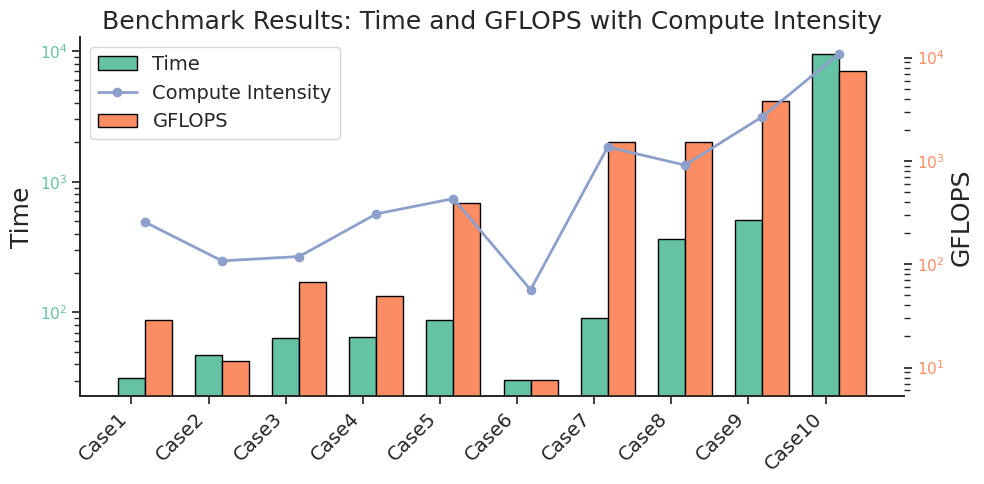

In [79]:
plot_benchmark_seaborn(cases, times, gflops, intensities)

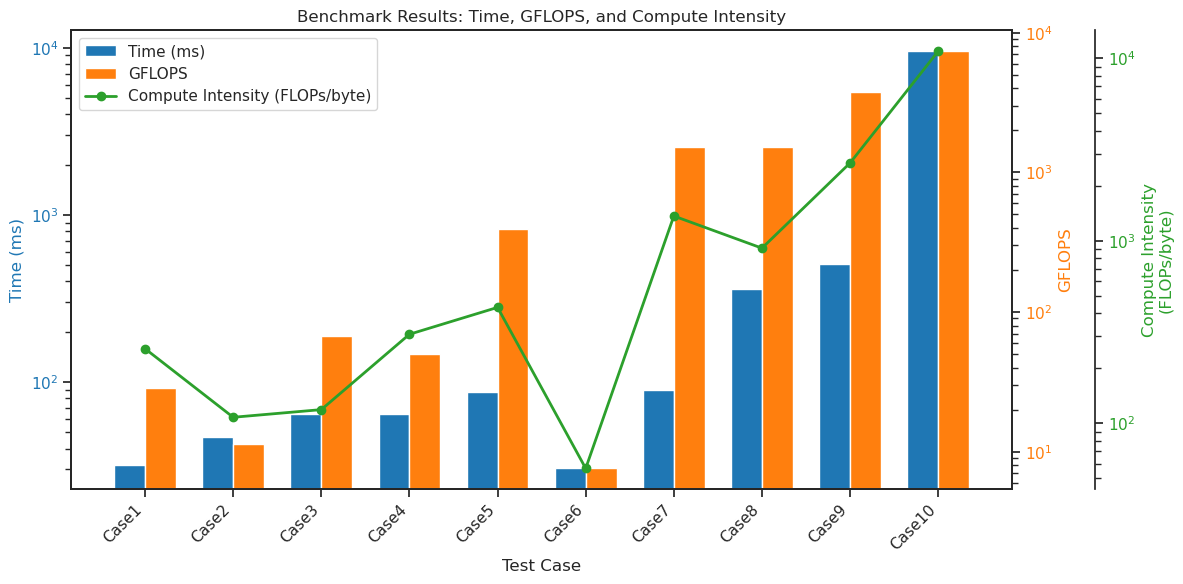

In [77]:
plot_benchmark(cases, times, gflops, intensities)